In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

### Import train and test data

In [2]:
house_train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2S 45-46,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,no pool,no fence,none,0,2,2008,WD,Normal,208500
1,2,1-S 1945 & OLD,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,no pool,no fence,none,0,5,2007,WD,Normal,181500
2,3,2S 45-46,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,no pool,no fence,none,0,9,2008,WD,Normal,223500
3,4,2S 45-46,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,no pool,no fence,none,0,2,2006,WD,Abnorml,140000
4,5,2S 45-46,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,no pool,no fence,none,0,12,2008,WD,Normal,250000


## Dealing with missing values 

In [3]:
house_train.isna().sum(axis=0)
#showing the number of NA values but the data is too big to show up all the columns

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
# showing the columns with NA values  
nan_cols = [i for i in house_train.columns if house_train[i].isna().any()]
nan_cols

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [5]:
na_va=['LotFrontage', 'MasVnrType','MasVnrArea','BsmtQual','BsmtCond',
 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
j = house_train[na_va] 
j.isna().sum(axis=0)
# number of NA 

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

## Replace missing values

In [6]:
j.describe(include='all')
# replace numerical data with mean so Lot = 70.049958, MasVnrArea = 103.685262, GarageYrBlt = 1978.506164

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
count,1201.000000,1452,1452.000000,1423,1423,1422,1423,1422,1459,1379,1379.000000,1379,1379,1379
unique,NaN,4,NaN,4,4,4,6,6,5,6,NaN,3,5,5
top,NaN,None,NaN,TA,TA,No,Unf,Unf,SBrkr,Attchd,NaN,Unf,TA,TA
freq,NaN,864,NaN,649,1311,953,430,1256,1334,870,NaN,605,1311,1326
mean,70.049958,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978.506164,NaN,NaN,NaN
std,24.284752,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.689725,NaN,NaN,NaN
min,21.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900.000000,NaN,NaN,NaN
25%,59.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961.000000,NaN,NaN,NaN
50%,69.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980.000000,NaN,NaN,NaN
75%,80.000000,NaN,166.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN


In [7]:
house_clean=house_train.fillna(house_train.mean())
# replace the NA with mean in numercial variables 

In [8]:
house_clean = house_clean.apply(lambda x: x.fillna(x.value_counts().index[0]))
# replace missing values with mode values in categorical data

In [9]:
house_clean = house_clean.drop(['Id'],axis=1)

## Data explortary and feature engineering 

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

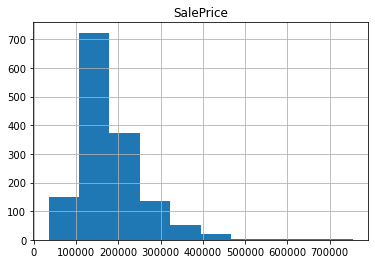

In [15]:
house_clean.hist('SalePrice')
# it is not normal distribution, imbalanced dataset 

### create sale price group based on distribution

In [10]:
bins= [0,110000,200000,800000]
labels = ['Lower Price','Middle Price','Higher Price']
house_clean['PriceGroup'] = pd.cut(house_clean['SalePrice'], bins=bins, labels=labels, right=False)

### data explortary

In [28]:
house_clean.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### OverallQual, YearBuilt, YearRemondAdd, TotalBsmtSF, Lstflrsf, GrLivArea, FullBath, TotRmsAbvgrd, GarageYrBlt, GarageArea are high correlated to SalePrice (more than 50%)

<AxesSubplot:>

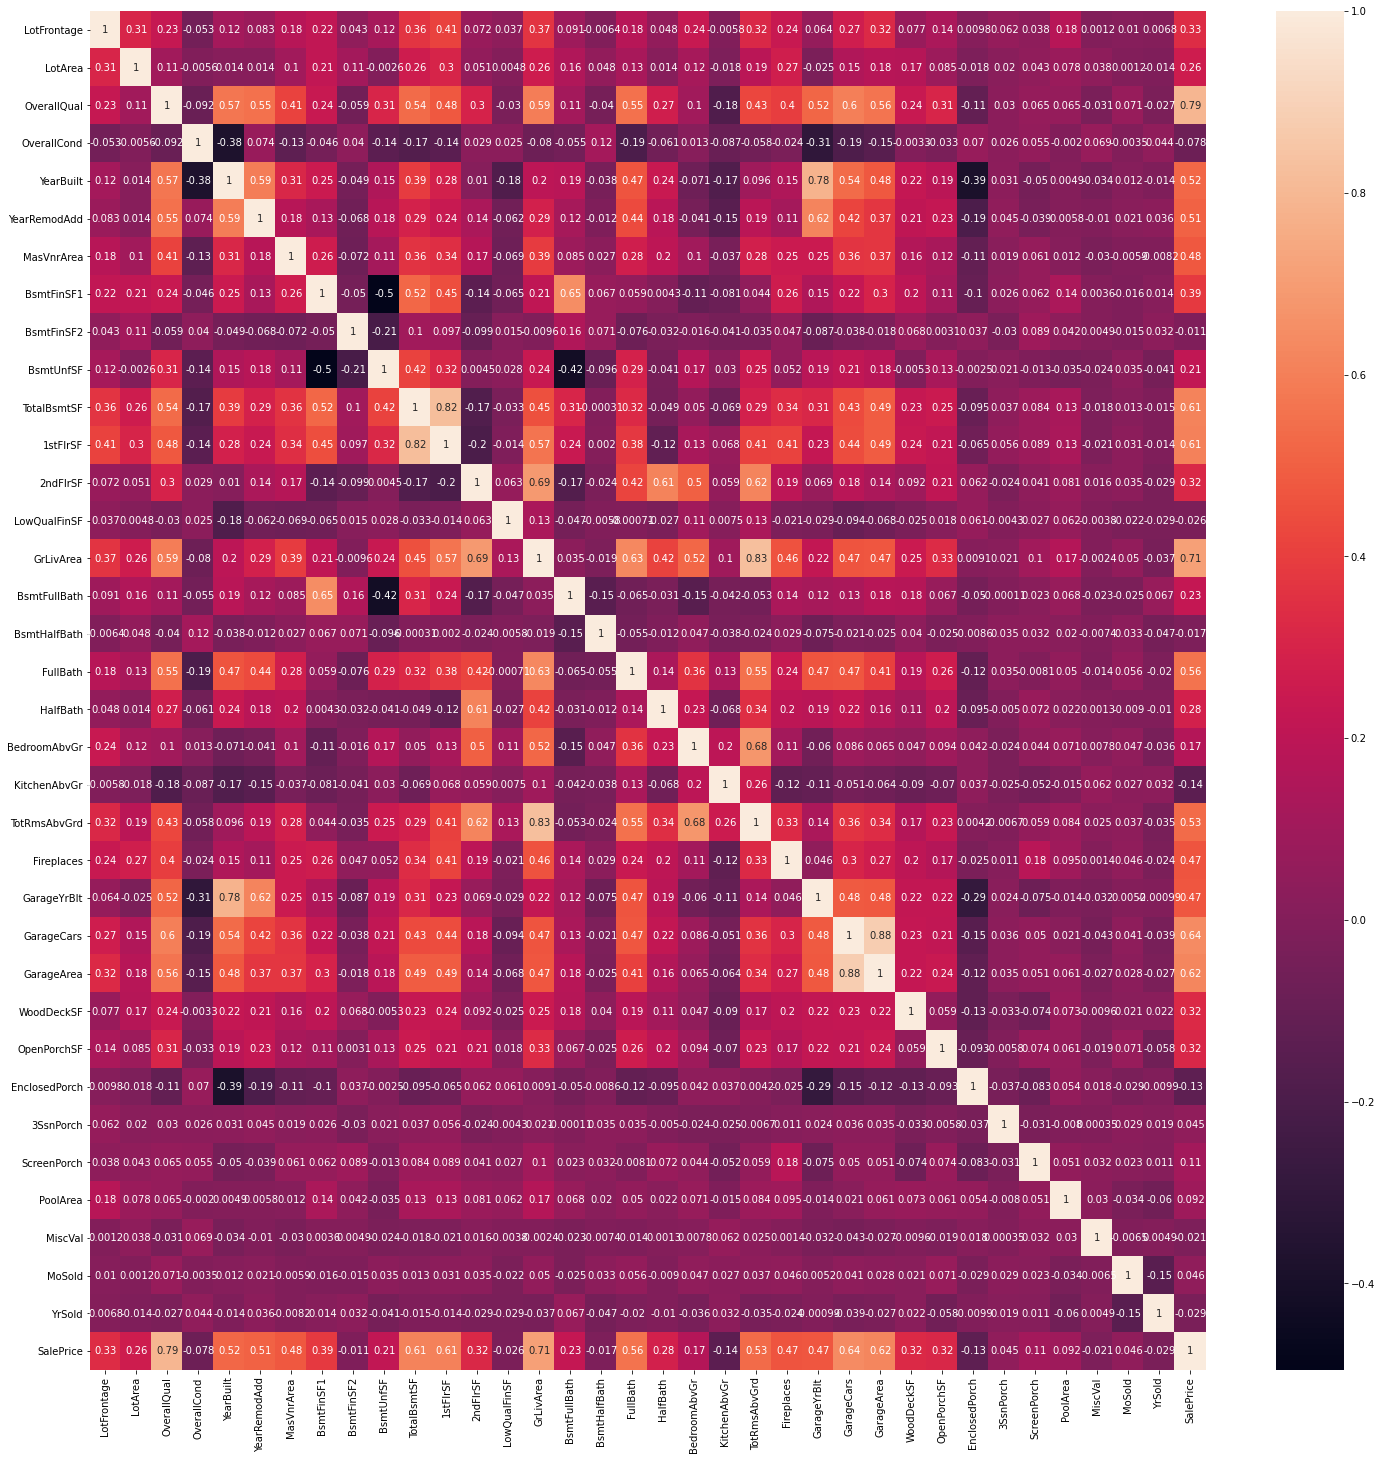

In [39]:
plt.figure(figsize=(25,25))
sns.heatmap(house_clean.corr(),annot=True)

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

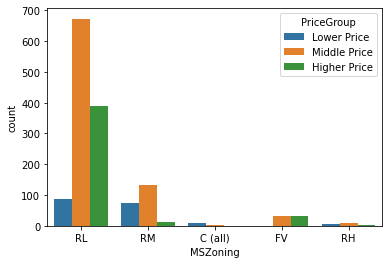

In [39]:
sns.countplot(x='MSZoning',hue='PriceGroup',data=house_clean)
# Commercial place has more lower price properties while FV (Floating Village Residential) has higher sale price in property

<AxesSubplot:xlabel='Alley', ylabel='count'>

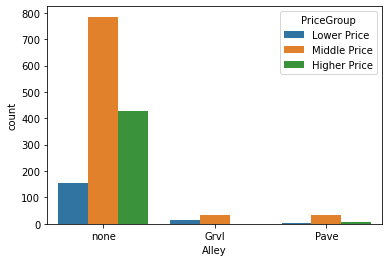

In [40]:
sns.countplot(x='Alley',hue='PriceGroup',data=house_clean)
# most of properties do not have alley access 

<AxesSubplot:xlabel='LotShape', ylabel='count'>

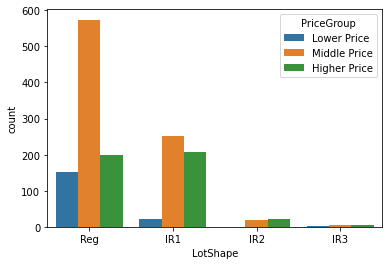

In [41]:
sns.countplot(x='LotShape',hue='PriceGroup',data=house_clean)
# lower price properites have less irregular properties 

<AxesSubplot:xlabel='LandContour', ylabel='count'>

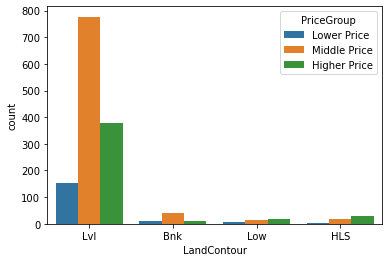

In [42]:
sns.countplot(x='LandContour',hue='PriceGroup',data=house_clean)

In [79]:
house_clean_dum=pd.get_dummies(house_clean)
house_corr_dum= house_clean_dum.corr()
saleprice = pd.DataFrame(house_corr_dum['SalePrice'])

In [123]:
preditor = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','BsmtQual_Ex','KitchenQual_Ex']


### Splite to train and test data 

In [124]:
X_house_clean= house_clean_dum[preditor]
y_house_clean= house_clean_dum['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X_house_clean, y_house_clean, test_size=0.3, random_state=0)

## Random Forset

In [125]:

#random forest 
clf=RandomForestClassifier(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,                                         max_features = "auto", min_samples_leaf = 60)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [126]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

53161.23739201551

In [138]:
test.dum = pd.get_dummies(test)
kag = test.dum[preditor]
kag = kag.apply(lambda x: x.fillna(x.value_counts().index[0]))